In [1]:
import pandas as pd 

In [2]:
import folium
import json

In [26]:
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns 
sns.set()

In [3]:
import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns 
sns.set()

In [29]:
plt.rc('font', family='GULIM')
print(plt.rcParams['font.family'])

['GULIM']


In [5]:
seoul_path = 'seoul.csv'

seoul = pd.read_csv(seoul_path)

seoul

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
0,23324279,제중건강원,NaN,D,소매,D10,건강/미용식품,D10A07,건강원,G47216,...,1156010600100410002034626,NaN,"서울특별시 영등포구 영중로14길 11-17, (영등포동5가)",150030,7250,NaN,1,NaN,126.907168,37.520613
1,24525909,민속악기사,NaN,D,소매,D04,취미/오락관련소매,D04A09,악기판매,G47593,...,1120012200101420011000227,NaN,"서울특별시 성동구 용답5길 2, (용답동)",133849,4803,NaN,NaN,NaN,127.049018,37.566857
2,24715368,태평양진주,NaN,D,소매,D26,시계/귀금속소매,D26A01,시계/귀금속,G47830,...,1111015200100440000000001,금사랑투빌딩,"서울특별시 종로구 서순라길 17-10, (봉익동)",110390,3138,NaN,NaN,NaN,126.993530,37.571848
3,15554136,김선희꼼꼼국어교습소,NaN,R,학문/교육,R01,학원-보습교습입시,R01A01,학원-입시,P85501,...,1171011100101970003017195,NaN,"서울특별시 송파구 위례성대로12길 31, (방이동)",138834,5640,NaN,2,NaN,127.121520,37.510967
4,17174175,비지트,NaN,Q,음식,Q01,한식,Q01A01,한식/백반/한정식,I56111,...,1165010100108540018009586,상랑의빌딩,"서울특별시 서초구 동광로18길 82, (방배동)",137837,6572,NaN,1,NaN,126.991394,37.488375
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361485,18770336,밀스튜디오,NaN,D,소매,D05,의복의류,D05A03,여성의류전문점,NaN,...,1150010200106390011027411,홈플러스강서점앤본사사옥,"서울특별시 강서구 화곡로 398, (등촌동)",157840,7567,NaN,1,NaN,126.854800,37.558456
361486,18773993,챔프컴퍼니,NaN,Q,음식,Q01,한식,Q01A01,한식/백반/한정식,I56111,...,1165010100109380024014572,NaN,"서울특별시 서초구 방배로23길 32-4, (방배동)",137844,6673,NaN,1,NaN,126.992590,37.486042
361487,18765728,제라클,NaN,D,소매,D06,가방/신발/액세서리,D06A05,액세서리판매,G47419,...,1165010200100820018005578,대산주택,"서울특별시 서초구 논현로27길 74, (양재동)",137890,6747,NaN,NaN,NaN,127.040527,37.478638
361488,18764585,아이에스에이주차타워,NaN,F,생활서비스,F14,자동차/이륜차,F14A07,주차장운영,H52915,...,1168010700106000001026870,ISA빌딩,"서울특별시 강남구 압구정로30길 51, (신사동)",135893,6025,NaN,NaN,NaN,127.029347,37.523924


In [5]:
seoul.시군구명.unique()

array(['영등포구', '성동구', '종로구', '송파구', '서초구', '동작구', '강남구', '마포구', '중랑구',
       '은평구', '성북구', '강동구', '양천구', '서대문구', '중구', '광진구', '용산구', '관악구',
       '강서구', '노원구', '강북구', '구로구', '금천구', '도봉구', '동대문구'], dtype=object)

In [9]:
seoul.columns

Index(['상가업소번호', '상호명', '지점명', '상권업종대분류코드', '상권업종대분류명', '상권업종중분류코드',
       '상권업종중분류명', '상권업종소분류코드', '상권업종소분류명', '표준산업분류코드', '표준산업분류명', '시도코드',
       '시도명', '시군구코드', '시군구명', '행정동코드', '행정동명', '법정동코드', '법정동명', '지번코드',
       '대지구분코드', '대지구분명', '지번본번지', '지번부번지', '지번주소', '도로명코드', '도로명', '건물본번지',
       '건물부번지', '건물관리번호', '건물명', '도로명주소', '구우편번호', '신우편번호', '동정보', '층정보',
       '호정보', '경도', '위도'],
      dtype='object')

In [10]:
mask1= (seoul.상권업종중분류명=='커피점/카페')

seoul.loc[mask1,:].상권업종소분류명.unique()

array(['커피전문점/카페/다방', '보드게임카페', '생과일주스전문점', '전통찻집/인삼찻집', '사주카페', '애견카페'],
      dtype=object)

In [11]:
mask2= (seoul.상권업종대분류명=='숙박')

seoul.loc[mask2,:].상권업종중분류명.unique()

array(['모텔/여관/여인숙', '호텔/콘도', '민박/하숙', '캠프/별장/펜션', '유스호스텔'], dtype=object)

In [12]:
mask3= (seoul.상권업종대분류명=='학문/교육')

seoul.loc[mask3,:].상권업종중분류명.unique()

array(['학원-보습교습입시', '학원-창업취업취미', '도서관/독서실', '학원-예능취미체육', '학원기타', '유아교육',
       '학문교육기타', '학원-음악미술무용', '학원-어학', '학원-자격/국가고시', '학원-컴퓨터'],
      dtype=object)

In [ ]:
### 발달상권과 골목상권 - 지리적 특성

map = folium.Map(
    location = [37.536399,127.000807],
    tiles = 'Stamen Terrain',
    zoom_start = 11
)


for i in seoul_yongsan.index :
    lat = seoul_yongsan.loc[i,'위도']
    lng = seoul_yongsan.loc[i, '경도']
    store_type = seoul_yongsan.loc[i, '상권업종대분류명']
    place = seoul_yongsan.loc[i, '행정동명']
                      
    #매장별 타입별 색상 선택을 위한 조건문 
    fillColor = ''
    #'소매', '음식', '학문/교육', '생활서비스', '부동산', '숙박', '관광/여가/오락', '스포츠'
    if store_type == '소매':
        fillColor = 'gray'
        size = 1
    elif store_type == '음식':
        fillColor = 'blue'
        size = 1
    elif store_type == '학문/교육':
        fillColor = 'green'
        size = 1
    elif store_type == '생활서비스':
        fillColor = 'purple'
        size = 1
    elif store_type == '관광/여가/오락':
        fillColor = 'lightgrey'
        size = 1
    elif store_type == '스포츠':
        fillColor = 'white'
        size = 1
        
    
    folium.CircleMarker(
    location = [lat,lng],
    color = fillColor,
    file = True,
    fill_color = fillColor,
    fill_opacity = 1,
    weight = 1,
    radius = size).add_to(map)
    
map.save('seoul_map40.html')
#seoul.상권업종중분류명.unique() #'커피점/카페'

In [13]:
seoul.상권업종중분류명.unique() #'커피점/카페'

array(['건강/미용식품', '취미/오락관련소매', '시계/귀금속소매', '학원-보습교습입시', '한식', '유흥주점',
       '학원-창업취업취미', '자동차/자동차용품', '부동산중개', '사진/광학/정밀기기소매', '도서관/독서실',
       '커피점/카페', '대중목욕탕/휴게', '주유소/충전소', '패스트푸드', '닭/오리요리', '자동차/이륜차',
       '선물/팬시/기념품', '이/미용/건강', '사무/문구/컴퓨터', '중식', 'PC/오락/당구/볼링등',
       '음/식료품소매', '종합소매점', '세탁/가사서비스', '기타서비스업', '의복의류', '가방/신발/액세서리',
       '양식', '제과제빵떡케익', '무도/유흥/가무', '가정/주방/인테리어', '운동/경기용품소매', '개인서비스',
       '학원-예능취미체육', '학원기타', '가전제품소매', '유아교육', '물품기기대여', '학문교육기타', '기타판매업',
       '사진', '분식', '화장품소매', '애견/애완/동물', '대행업', '철물/난방/건설자재소매',
       '학원-음악미술무용', '별식/퓨전요리', '주택수리', '연극/영화/극장', '모텔/여관/여인숙', '호텔/콘도',
       '실내운동시설', '의약/의료품소매', '실외운동시설', '학원-어학', '기타음식업', '광고/인쇄',
       '예식/의례/관혼상제', '책/서적/도서', '가구소매', '요가/단전/마사지', '운송/배달/택배', '일식/수산물',
       '개인/가정용품수리', '인력/고용/용역알선', '평가/개발/관리', '법무세무회계', '운영관리시설', '부페',
       '중고품소매/교환', '장례/묘지', '분양', '예술품/골동품/수석/분재', '유아용품', '페인트/유리제품소매',
       '행사/이벤트', '스포츠/운동', '음식배달서비스', '놀이/여가/취미', '종교용품판매', '민박/하숙',
       '경마/경륜/성인

In [14]:
상권업종대분류명_cnt = seoul.상권업종대분류명.value_counts()
상권업종대분류명_cnt

음식          121534
소매          103889
생활서비스        74450
학문/교육        26193
부동산          18600
관광/여가/오락      9167
스포츠           5290
숙박            2367
Name: 상권업종대분류명, dtype: int64

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, '음식'),
  Text(1, 0, '소매'),
  Text(2, 0, '생활서비스'),
  Text(3, 0, '부동산'),
  Text(4, 0, '학문/교육'),
  Text(5, 0, '관광/여가/오락'),
  Text(6, 0, '숙박'),
  Text(7, 0, '스포츠')])

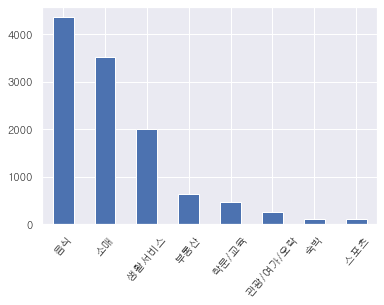

In [30]:
상권업종대분류명_cnt.plot.bar()
plt.xticks(rotation=50)

음식점 - 카테고리 

## 발달상권과 골목상권 - 지리적 특성
### 40년 
#### 건물 밀집도 높은 건 역사적/문화재 , 주거는 아님 
#### (성북구/동대문구/용산구)

In [7]:
mask_loc1 = (seoul.시군구명=='성북구')
mask_loc2 = (seoul.시군구명=='동대문구')
mask_loc3 = (seoul.시군구명=='용산구')
mask_loc4 = (seoul.시군구명=='금천구')

In [8]:
seoul_yongsan = seoul.loc[mask_loc3,:]
seoul_yongsan

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
36,21518380,대성부동산,NaN,L,부동산,L01,부동산중개,L01A01,부동산중개,L68221,...,1117012900102030061011030,NaN,"서울특별시 용산구 이촌로22길 20, (이촌동)",140909,4374,NaN,NaN,NaN,126.955577,37.525295
46,24103610,남강컴퓨터,NaN,D,소매,D08,사무/문구/컴퓨터,D08A03,컴퓨터/사무용기기종합,G47311,...,1117012300100160028000294,원효전자상가,"서울특별시 용산구 청파로 83, (한강로3가, 원효전자상가)",140879,4366,NaN,2,NaN,126.960850,37.533351
106,24066257,광주요,한남점,D,소매,D07,가정/주방/인테리어,D07A17,주방가구판매,G47520,...,1117013100100680003006067,NaN,"서울특별시 용산구 한남대로20길 28, (한남동)",140886,4419,NaN,1,NaN,127.008408,37.534878
186,19970936,치킨호프,NaN,Q,음식,Q05,닭/오리요리,Q05A08,후라이드/양념치킨,I56193,...,1117011700101240001018209,금성아파트,"서울특별시 용산구 원효로 129, (원효로3가, 금성)",140848,4363,NaN,-1,NaN,126.957471,37.533880
193,24663597,난파피아노,NaN,R,학문/교육,R05,학원-음악미술무용,R05A02,피아노/바이올린/기타,P85620,...,1117011900100050585029089,중앙병원,"서울특별시 용산구 효창원로 142, (효창동)",140896,4317,NaN,2,NaN,126.961985,37.540471
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361376,18751677,펠리시티61,NaN,L,부동산,L03,분양,L03A01,주택공급,L68121,...,1117011300100610008019458,NaN,"서울특별시 용산구 원효로56길 21-5, (원효로2가)",140847,4367,NaN,NaN,NaN,126.963193,37.534931
361413,18757131,엠피연구소,NaN,Q,음식,Q06,양식,Q06A01,정통양식/경양식,I56114,...,1117012500100800002013446,풍양빌딩,"서울특별시 용산구 한강대로40가길 7, (한강로2가)",140872,4382,NaN,1,NaN,126.971073,37.530441
361427,18745086,서희기획,NaN,F,생활서비스,F07,물품기기대여,F07A17,연극공연/영화제작용품임대,L69390,...,1117013000100210001010496,태광빌딩,"서울특별시 용산구 보광로 90, (이태원동)",140858,4406,NaN,4,NaN,126.995615,37.531192
361451,18761103,네오미조NAOMIJOE,NaN,D,소매,D03,종합소매점,D03A05,수입품판매점,G47190,...,1117010200100300005025353,NaN,"서울특별시 용산구 신흥로11나길 2-11, (용산동2가)",140841,4338,NaN,2,NaN,126.986200,37.543853


In [10]:
seoul_yongsan.columns

Index(['상가업소번호', '상호명', '지점명', '상권업종대분류코드', '상권업종대분류명', '상권업종중분류코드',
       '상권업종중분류명', '상권업종소분류코드', '상권업종소분류명', '표준산업분류코드', '표준산업분류명', '시도코드',
       '시도명', '시군구코드', '시군구명', '행정동코드', '행정동명', '법정동코드', '법정동명', '지번코드',
       '대지구분코드', '대지구분명', '지번본번지', '지번부번지', '지번주소', '도로명코드', '도로명', '건물본번지',
       '건물부번지', '건물관리번호', '건물명', '도로명주소', '구우편번호', '신우편번호', '동정보', '층정보',
       '호정보', '경도', '위도'],
      dtype='object')

In [11]:
seoul_yongsan['행정동명']

36         이촌2동
46         한강로동
106         한남동
186       원효로2동
193         효창동
          ...  
361376    원효로1동
361413     한강로동
361427    이태원1동
361451    용산2가동
361454      한남동
Name: 행정동명, Length: 11496, dtype: object

In [9]:
상권업종대분류명_cnt = seoul_yongsan.상권업종대분류명.value_counts()
상권업종대분류명_cnt

음식          4364
소매          3531
생활서비스       2015
부동산          638
학문/교육        465
관광/여가/오락     250
숙박           120
스포츠          113
Name: 상권업종대분류명, dtype: int64

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, '음식'),
  Text(1, 0, '소매'),
  Text(2, 0, '생활서비스'),
  Text(3, 0, '부동산'),
  Text(4, 0, '학문/교육'),
  Text(5, 0, '관광/여가/오락'),
  Text(6, 0, '숙박'),
  Text(7, 0, '스포츠')])

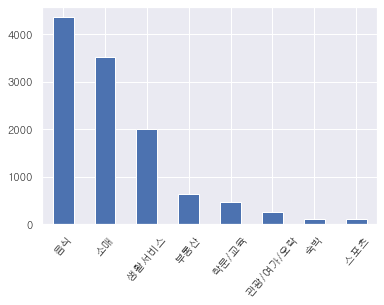

In [33]:
상권업종대분류명_cnt = seoul_yongsan.상권업종대분류명.value_counts()
상권업종대분류명_cnt.plot.bar()
plt.xticks(rotation=50)

In [14]:
mask1= (seoul_yongsan.상권업종대분류명=='음식')

seoul_yongsan.loc[mask1,:].상권업종중분류명.unique()

array(['닭/오리요리', '일식/수산물', '한식', '분식', '커피점/카페', '양식', '제과제빵떡케익',
       '별식/퓨전요리', '패스트푸드', '유흥주점', '중식', '부페', '기타음식업', '음식배달서비스'],
      dtype=object)

In [12]:
mask1= (seoul_yongsan.상권업종대분류명=='음식')

seoul_yongsan.loc[mask1,:].상권업종소분류명.unique()

array(['후라이드/양념치킨', '음식점-일식', '한식/백반/한정식', '라면김밥분식', '커피전문점/카페/다방',
       '정통양식/경양식', '제과점', '순대전문점', '우동전문점', '피자전문', '도시락전문점', '횟집',
       '기타전문서양음식점', '갈비/삼겹살', '매운탕전문', '생과일주스전문점', '소주방/포장마차', '철판구이요리전문',
       '떡/한과집', '떡볶이전문', '호프/맥주', '곱창/양구이전문', '기타일반유흥주점', '빠/카페/스탠드빠',
       '꼬치구이전문점', '족발/보쌈전문', '국수/만두/칼국수', '중국음식/중국집', '룸살롱/단란주점', '참치전문점',
       '음식점-초밥전문', '패스트푸드', '종합부페', '기타고기요리', '돈가스전문점', '냉면집', '떡전문',
       '토스트전문', '샤브샤브전문', '퓨전음식전문', '패밀리레스토랑', '동남아음식전문점', '해장국/감자탕',
       '삼계탕전문', '죽전문점', '케익전문점', '낙지/오징어', '부대찌개/섞어찌개', '갈치/생선구이', '아구전문',
       '설렁탕집', '쌈밥전문', '민속주점', '전통찻집/인삼찻집', '구내식당/자급식음식점', '음식출장조달',
       '닭갈비전문', '사주카페', '두부요리전문', '아이스크림판매', '기사식당', '닭내장/닭발요리', '카레전문점',
       '보리밥전문', '해물찜/탕전문', '추어탕전문', '고속도로휴게소', '바베큐전문', '민물장어전문',
       '스테이크전문점', '수산물전문음식점-종합', '스파게티전문점', '도너츠전문', '옻닭전문', '핫도그',
       '한정식전문', '순두부전문', '찜닭전문점', '돌솥/비빕밥전문점', '황태전문', '파전전문', '곰장어전문',
       '굴요리전문', '오리고기전문', '샌드위치전문점', '야식집', '스낵', '로바다야끼', '닭도리탕전문',
       '사철

In [15]:
mask1= (seoul_yongsan.상권업종대분류명=='음식')
mask2= (seoul_yongsan.상권업종중분류명=='음식배달서비스')

seoul_yongsan.loc[mask1|mask2,:].상권업종소분류명.unique()

array(['후라이드/양념치킨', '음식점-일식', '한식/백반/한정식', '라면김밥분식', '커피전문점/카페/다방',
       '정통양식/경양식', '제과점', '순대전문점', '우동전문점', '피자전문', '도시락전문점', '횟집',
       '기타전문서양음식점', '갈비/삼겹살', '매운탕전문', '생과일주스전문점', '소주방/포장마차', '철판구이요리전문',
       '떡/한과집', '떡볶이전문', '호프/맥주', '곱창/양구이전문', '기타일반유흥주점', '빠/카페/스탠드빠',
       '꼬치구이전문점', '족발/보쌈전문', '국수/만두/칼국수', '중국음식/중국집', '룸살롱/단란주점', '참치전문점',
       '음식점-초밥전문', '패스트푸드', '종합부페', '기타고기요리', '돈가스전문점', '냉면집', '떡전문',
       '토스트전문', '샤브샤브전문', '퓨전음식전문', '패밀리레스토랑', '동남아음식전문점', '해장국/감자탕',
       '삼계탕전문', '죽전문점', '케익전문점', '낙지/오징어', '부대찌개/섞어찌개', '갈치/생선구이', '아구전문',
       '설렁탕집', '쌈밥전문', '민속주점', '전통찻집/인삼찻집', '구내식당/자급식음식점', '음식출장조달',
       '닭갈비전문', '사주카페', '두부요리전문', '아이스크림판매', '기사식당', '닭내장/닭발요리', '카레전문점',
       '보리밥전문', '해물찜/탕전문', '추어탕전문', '고속도로휴게소', '바베큐전문', '민물장어전문',
       '스테이크전문점', '수산물전문음식점-종합', '스파게티전문점', '도너츠전문', '옻닭전문', '핫도그',
       '한정식전문', '순두부전문', '찜닭전문점', '돌솥/비빕밥전문점', '황태전문', '파전전문', '곰장어전문',
       '굴요리전문', '오리고기전문', '샌드위치전문점', '야식집', '스낵', '로바다야끼', '닭도리탕전문',
       '사철

In [16]:
a = ['닭/오리요리',  '한식', '분식', '제과제빵떡케익','별식/퓨전요리', '중식', '부페' ] #'기타음식업''음식배달서비스'

b = ['일식/수산물','커피점/카페','양식' ,'패스트푸드', '유흥주점']

In [13]:
a= ['후라이드/양념치킨', '음식점-일식', '한식/백반/한정식', '라면김밥분식',
       '정통양식/경양식', '제과점', '순대전문점', '우동전문점', '피자전문', '도시락전문점', '횟집',
       '기타전문서양음식점', '갈비/삼겹살', '매운탕전문', '생과일주스전문점', '소주방/포장마차', '철판구이요리전문',
       '떡/한과집', '떡볶이전문', '호프/맥주', '곱창/양구이전문', '기타일반유흥주점', '빠/카페/스탠드빠',
       '꼬치구이전문점', '족발/보쌈전문', '국수/만두/칼국수', '중국음식/중국집', '룸살롱/단란주점', '참치전문점',
       '음식점-초밥전문', '패스트푸드', '종합부페', '기타고기요리', '돈가스전문점', '냉면집', '떡전문',
       '토스트전문', '샤브샤브전문', '퓨전음식전문', '패밀리레스토랑', '동남아음식전문점', '해장국/감자탕',
       '삼계탕전문', '죽전문점', '케익전문점', '낙지/오징어', '부대찌개/섞어찌개', '갈치/생선구이', '아구전문',
       '설렁탕집', '쌈밥전문', '민속주점', '전통찻집/인삼찻집', '구내식당/자급식음식점', '음식출장조달',
       '닭갈비전문', '사주카페', '두부요리전문', '아이스크림판매', '기사식당', '닭내장/닭발요리', '카레전문점',
       '보리밥전문', '해물찜/탕전문', '추어탕전문', '고속도로휴게소', '바베큐전문', '민물장어전문',
       '스테이크전문점', '수산물전문음식점-종합', '스파게티전문점', '도너츠전문', '옻닭전문', '핫도그',
       '한정식전문', '순두부전문', '찜닭전문점', '돌솥/비빕밥전문점', '황태전문', '파전전문', '곰장어전문',
       '굴요리전문', '오리고기전문', '샌드위치전문점', '야식집',  '로바다야끼', '닭도리탕전문',
       '사철탕전문', '게장전문', '복전문', '불닭전문', '홍어전문', '국/찌개배달',
       '조개구이전문']




b=[ '커피전문점/카페/다방','보드게임카페','스낵',]

In [34]:
### 발달상권과 골목상권 - 지리적 특성
#'기타음식업''음식배달서비스' 제외
a = ['닭/오리요리',  '한식', '분식', '제과제빵떡케익','별식/퓨전요리', '중식', '부페' ] 
b = ['일식/수산물','커피점/카페','양식' ,'패스트푸드', '유흥주점']


map = folium.Map(
    location = [37.536399,127.000807],
    tiles = 'Stamen Terrain',
    zoom_start = 11
)


for i in seoul_yongsan.index :
    lat = seoul_yongsan.loc[i,'위도']
    lng = seoul_yongsan.loc[i, '경도']
    store_type = seoul_yongsan.loc[i, '상권업종중분류명']
    
                      
    #매장별 타입별 색상 선택을 위한 조건문 
    fillColor = ''
    #'소매', '음식', '학문/교육', '생활서비스', '부동산', '숙박', '관광/여가/오락', '스포츠'
    if store_type in a:
        fillColor = 'black'
        size = 1
    elif store_type in b:
        fillColor = 'white'
        size = 1
        
    
    folium.CircleMarker(
    location = [lat,lng],
    color = fillColor,
    file = True,
    fill_color = fillColor,
    fill_opacity = 1,
    weight = 1,
    radius = size).add_to(map)
    
map
map.save('SBDDYS.html')
#seoul.상권업종중분류명.unique() #'커피점/카페'

In [ ]:
### 발달상권과 골목상권 - 지리적 특성

map = folium.Map(
    location = [37.536399,127.000807],
    tiles = 'Stamen Terrain',
    zoom_start = 11
)


for i in seoul40.index :
    lat = seoul40.loc[i,'위도']
    lng = seoul40.loc[i, '경도']
    store_type = seoul40.loc[i, '상권업종대분류명']
    
                      
    #매장별 타입별 색상 선택을 위한 조건문 a
    fillColor = ''
    #'소매', '음식', '학문/교육', '생활서비스', '부동산', '숙박', '관광/여가/오락', '스포츠'
    if store_type == '소매':
        fillColor = 'gray'
        size = 1
    elif store_type == '음식':
        fillColor = 'blue'
        size = 1
    elif store_type == '학문/교육':
        fillColor = 'green'
        size = 1
    elif store_type == '생활서비스':
        fillColor = 'purple'
        size = 1
    elif store_type == '관광/여가/오락':
        fillColor = 'lightgrey'
        size = 1
    elif store_type == '스포츠':
        fillColor = 'white'
        size = 1
        
    
    folium.CircleMarker(
    location = [lat,lng],
    color = fillColor,
    file = True,
    fill_color = fillColor,
    fill_opacity = 1,
    weight = 1,
    radius = size).add_to(map)
    
map.save('seoul_map40.html')
#seoul.상권업종중분류명.unique() #'커피점/카페'

In [21]:
seoul40 = seoul.loc[mask_loc1|mask_loc2|mask_loc3,:]

seoul40

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
11,23991927,NOV스튜디오,NaN,D,소매,D18,사진/광학/정밀기기소매,D18A03,카메라판매,G47823,...,1129010100102300001051885,NaN,"서울특별시 성북구 성북로 132-1, (성북동)",136824,2837,NaN,NaN,NaN,126.995012,37.594603
36,21518380,대성부동산,NaN,L,부동산,L01,부동산중개,L01A01,부동산중개,L68221,...,1117012900102030061011030,NaN,"서울특별시 용산구 이촌로22길 20, (이촌동)",140909,4374,NaN,NaN,NaN,126.955577,37.525295
39,28516285,러쉬,현대백화점미아점,D,소매,D03,종합소매점,D03A01,편의점,G47122,...,1129013400100200001025204,현대백화점미아점,"서울특별시 성북구 동소문로 315, (길음동)",136719,2730,NaN,NaN,NaN,127.028726,37.608392
44,24522543,엘앤비,NaN,F,생활서비스,F14,자동차/이륜차,F14A01,자동차정비/카센타,NaN,...,1129011900102940000043879,NaN,"서울특별시 성북구 동소문로27길 1, (동선동4가)",136054,2829,NaN,NaN,NaN,127.018803,37.594641
46,24103610,남강컴퓨터,NaN,D,소매,D08,사무/문구/컴퓨터,D08A03,컴퓨터/사무용기기종합,G47311,...,1117012300100160028000294,원효전자상가,"서울특별시 용산구 청파로 83, (한강로3가, 원효전자상가)",140879,4366,NaN,2,NaN,126.960850,37.533351
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361435,18759418,약도라지,NaN,D,소매,D01,음/식료품소매,D01A13,청과물소매,G47214,...,1123010300109880024034561,NaN,"서울특별시 동대문구 고산자로38길 31-9, (제기동)",130865,2571,NaN,NaN,NaN,127.040092,37.580597
361436,18753208,인셀덤스토리,NaN,D,소매,D16,화장품소매,D16A01,화장품판매점,G47813,...,1123011000100640000001830,쌍용아파트,"서울특별시 동대문구 한천로58길 47, (이문동, 쌍용아파트)",130765,2423,103,NaN,NaN,127.068767,37.598947
361451,18761103,네오미조NAOMIJOE,NaN,D,소매,D03,종합소매점,D03A05,수입품판매점,G47190,...,1117010200100300005025353,NaN,"서울특별시 용산구 신흥로11나길 2-11, (용산동2가)",140841,4338,NaN,2,NaN,126.986200,37.543853
361454,18752166,치로피자바,NaN,Q,음식,Q06,양식,Q06A01,정통양식/경양식,I56114,...,1117013100106830130004934,NaN,"서울특별시 용산구 이태원로 254, (한남동)",140892,4400,NaN,3,NaN,127.001158,37.537222


In [22]:
### 발달상권과 골목상권 - 지리적 특성

map = folium.Map(
    location = [37.536399,127.000807],
    tiles = 'Stamen Terrain',
    zoom_start = 11
)


for i in seoul40.index :
    lat = seoul40.loc[i,'위도']
    lng = seoul40.loc[i, '경도']
    store_type = seoul40.loc[i, '상권업종대분류명']
    
                      
    #매장별 타입별 색상 선택을 위한 조건문 a
    fillColor = ''
    #'소매', '음식', '학문/교육', '생활서비스', '부동산', '숙박', '관광/여가/오락', '스포츠'
    if store_type == '소매':
        fillColor = 'gray'
        size = 1
    elif store_type == '음식':
        fillColor = 'blue'
        size = 1
    elif store_type == '학문/교육':
        fillColor = 'green'
        size = 1
    elif store_type == '생활서비스':
        fillColor = 'purple'
        size = 1
    elif store_type == '관광/여가/오락':
        fillColor = 'lightgrey'
        size = 1
    elif store_type == '스포츠':
        fillColor = 'white'
        size = 1
        
    
    folium.CircleMarker(
    location = [lat,lng],
    color = fillColor,
    file = True,
    fill_color = fillColor,
    fill_opacity = 1,
    weight = 1,
    radius = size).add_to(map)
    
map.save('seoul_map40.html')
#seoul.상권업종중분류명.unique() #'커피점/카페'

In [39]:
### 발달상권과 골목상권 - 지리적 특성

map = folium.Map(
    location = [37.536399,127.000807],
    tiles = 'Stamen Terrain',
    zoom_start = 11
)


for i in seoul40.index :
    lat = seoul40.loc[i,'위도']
    lng = seoul40.loc[i, '경도']
    store_type = seoul40.loc[i, '상권업종대분류명']
    
                      
    #매장별 타입별 색상 선택을 위한 조건문 
    fillColor = ''
    #'소매', '음식', '학문/교육', '생활서비스', '부동산', '숙박', '관광/여가/오락', '스포츠'
    if store_type == '소매':
        fillColor = 'gray'
        size = 1
    elif store_type == '음식':
        fillColor = 'blue'
        size = 1
    elif store_type == '학문/교육':
        fillColor = 'green'
        size = 1
    elif store_type == '생활서비스':
        fillColor = 'purple'
        size = 1
    elif store_type == '관광/여가/오락':
        fillColor = 'lightgrey'
        size = 1
    elif store_type == '스포츠':
        fillColor = 'white'
        size = 1
        
    
    folium.CircleMarker(
    location = [lat,lng],
    color = fillColor,
    file = True,
    fill_color = fillColor,
    fill_opacity = 1,
    weight = 1,
    radius = size).add_to(map)
    
map.save('seoul_map40.html')
#seoul.상권업종중분류명.unique() #'커피점/카페'

In [29]:
seoul30_39 = seoul.loc[mask_loc3|mask_loc4,:]

seoul30_39

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
36,21518380,대성부동산,NaN,L,부동산,L01,부동산중개,L01A01,부동산중개,L68221,...,1117012900102030061011030,NaN,"서울특별시 용산구 이촌로22길 20, (이촌동)",140909,4374,NaN,NaN,NaN,126.955577,37.525295
46,24103610,남강컴퓨터,NaN,D,소매,D08,사무/문구/컴퓨터,D08A03,컴퓨터/사무용기기종합,G47311,...,1117012300100160028000294,원효전자상가,"서울특별시 용산구 청파로 83, (한강로3가, 원효전자상가)",140879,4366,NaN,2,NaN,126.960850,37.533351
76,21638129,월드탑공인중개사사무소,NaN,L,부동산,L01,부동산중개,L01A01,부동산중개,L68221,...,1154510200109030010009209,NaN,"서울특별시 금천구 남부순환로128길 21, (독산동)",153820,8548,NaN,1,NaN,126.907429,37.479374
94,24892905,동양잉크테크,NaN,D,소매,D08,사무/문구/컴퓨터,D08A01,사무/문구용품,G47612,...,1154510100100600073015862,벽산디지털밸리5차,"서울특별시 금천구 벚꽃로 244, (가산동)",153788,8513,NaN,NaN,NaN,126.885794,37.476748
106,24066257,광주요,한남점,D,소매,D07,가정/주방/인테리어,D07A17,주방가구판매,G47520,...,1117013100100680003006067,NaN,"서울특별시 용산구 한남대로20길 28, (한남동)",140886,4419,NaN,1,NaN,127.008408,37.534878
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361413,18757131,엠피연구소,NaN,Q,음식,Q06,양식,Q06A01,정통양식/경양식,I56114,...,1117012500100800002013446,풍양빌딩,"서울특별시 용산구 한강대로40가길 7, (한강로2가)",140872,4382,NaN,1,NaN,126.971073,37.530441
361415,18761861,노승현,NaN,F,생활서비스,F12,광고/인쇄,F12A05,광고물제작-종합,C33910,...,1154510200109020003000001,에이스빌,"서울특별시 금천구 독산로108길 72, 1동 (독산동, 에이스빌)",153820,8548,1,NaN,NaN,126.907818,37.479855
361427,18745086,서희기획,NaN,F,생활서비스,F07,물품기기대여,F07A17,연극공연/영화제작용품임대,L69390,...,1117013000100210001010496,태광빌딩,"서울특별시 용산구 보광로 90, (이태원동)",140858,4406,NaN,4,NaN,126.995615,37.531192
361451,18761103,네오미조NAOMIJOE,NaN,D,소매,D03,종합소매점,D03A05,수입품판매점,G47190,...,1117010200100300005025353,NaN,"서울특별시 용산구 신흥로11나길 2-11, (용산동2가)",140841,4338,NaN,2,NaN,126.986200,37.543853


In [30]:
seoul30_39.상권업종대분류명.value_counts().to_frame()

,상권업종대분류명
음식,7442
소매,6740
생활서비스,4414
부동산,1261
학문/교육,1020
관광/여가/오락,475
스포츠,240
숙박,181


In [31]:
seoul30_39.상권업종중분류명.value_counts().to_frame()

,상권업종중분류명
한식,2396
종합소매점,1377
이/미용/건강,1341
커피점/카페,1215
의복의류,1099
...,...
음식배달서비스,6
스포츠/운동,4
놀이/여가/취미,4
부동산관련서비스,1


In [36]:
### 발달상권과 골목상권 - 지리적 특성

map = folium.Map(
    location = [37.536399,127.000807],
    tiles = 'Stamen Terrain',
    zoom_start = 11
)


for i in seoul30_39.index :
    lat = seoul30_39.loc[i,'위도']
    lng = seoul30_39.loc[i, '경도']
    store_type = seoul30_39.loc[i, '상권업종대분류명']
    
                      
    #매장별 타입별 색상 선택을 위한 조건문 
    fillColor = ''
    #'소매', '음식', '학문/교육', '생활서비스', '부동산', '숙박', '관광/여가/오락', '스포츠'
    if store_type == '소매':
        fillColor = 'gray'
        size = 1
    elif store_type == '음식':
        fillColor = 'blue'
        size = 1
    elif store_type == '학문/교육':
        fillColor = 'green'
        size = 1
    elif store_type == '생활서비스':
        fillColor = 'purple'
        size = 1
    elif store_type == '관광/여가/오락':
        fillColor = 'lightgrey'
        size = 1
    elif store_type == '스포츠':
        fillColor = 'white'
        size = 1
        
    
    folium.CircleMarker(
    location = [lat,lng],
    color = fillColor,
    file = True,
    fill_color = fillColor,
    fill_opacity = 1,
    weight = 1,
    radius = size).add_to(map)
    
map.save('seoul_map3039.html')
#seoul.상권업종중분류명.unique() #'커피점/카페'

### 20-30년 + 역세권 

### 30-39년
#### 고립된 장치
#### 용산구, 금천구, 보강동

In [35]:
mask_loc1 = (seoul.시군구명=='한남동')
mask_loc2 = (seoul.시군구명=='동대문구')
mask_loc3 = (seoul.시군구명=='용산구')
mask_loc4 = (seoul.시군구명=='금천구')

seoul30_39 = seoul.loc[mask_loc3|mask_loc4,:]

seoul30_39.save('seoul_map3039.html')

AttributeError: 'DataFrame' object has no attribute 'save'

In [34]:
mask1 = (seoul.행정동명=='한남동')
mask2 = (seoul.행정동명=='한남동')
seoul.행정동명

Index(['상가업소번호', '상호명', '지점명', '상권업종대분류코드', '상권업종대분류명', '상권업종중분류코드',
       '상권업종중분류명', '상권업종소분류코드', '상권업종소분류명', '표준산업분류코드', '표준산업분류명', '시도코드',
       '시도명', '시군구코드', '시군구명', '행정동코드', '행정동명', '법정동코드', '법정동명', '지번코드',
       '대지구분코드', '대지구분명', '지번본번지', '지번부번지', '지번주소', '도로명코드', '도로명', '건물본번지',
       '건물부번지', '건물관리번호', '건물명', '도로명주소', '구우편번호', '신우편번호', '동정보', '층정보',
       '호정보', '경도', '위도'],
      dtype='object')

### 20-29년
#### 경리단길, 골목상권길이 형성되었다
#### 한남동